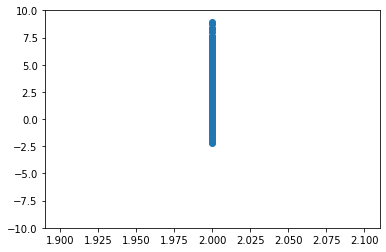

3.007637712466247


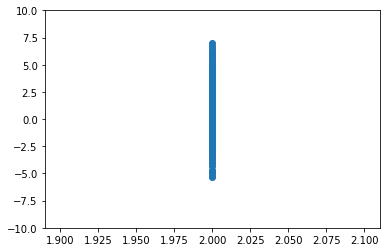

0.9461411936154273


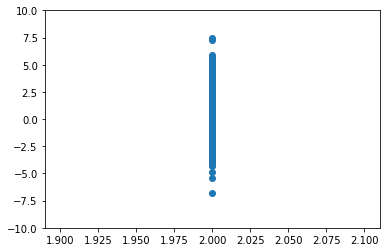

0.9447452404033875


In [2]:
# tests for whether PC networks can in fact do causal do inference
import matplotlib.pyplot as plt
import numpy as np
# first recreate plots from ferencs blog -- https://www.inference.vc/causal-inference-2-illustrating-interventions-in-a-toy-example/
def f1(do_x = None):
  x = np.random.normal(0,1)
  if do_x is not None:
    x = do_x
  y = x + 1 + np.sqrt(3) * np.random.normal(0,1)
  if do_x is not None:
    x = do_x
  return x,y

def f2(do_x = None):
  y = 1 + 2 * np.random.normal(0,1)
  if do_x is not None:
    x = do_x
  x = ((y-1)/4) + (np.sqrt(3) * np.random.normal(0,1))/2
  if do_x is not None:
    x = do_x
  return x,y

def f3(do_x = None):
  z = np.random.normal(0,1)
  if do_x is not None:
    x = do_x
  y = z + 1 + np.sqrt(3) * np.random.normal(0,1)
  if do_x is not None:
    x = do_x
  x = z
  if do_x is not None:
    x = do_x
  return x,y

def simulate_collate(N,f):
  xs =[]
  ys = []
  for i in range(1000):
    x,y = f(do_x = 2)
    xs.append(x)
    ys.append(y)
  return xs, ys

xs1,ys1 = simulate_collate(1000, f1)
plt.scatter(xs1,ys1)
plt.ylim(-10,10)
plt.show()
print(np.mean(np.array(ys1)))
xs2,ys2 = simulate_collate(1000, f2)
plt.scatter(xs2, ys2)
plt.ylim(-10,10)
plt.show()
print(np.mean(np.array(ys2)))
xs3,ys3 = simulate_collate(1000, f3)
plt.scatter(xs3,ys3)
plt.ylim(-10,10)
plt.show()
print(np.mean(np.array(ys3)))


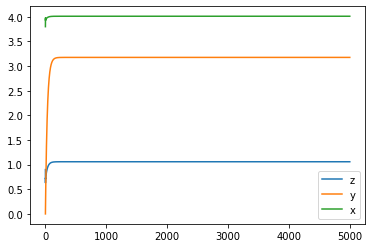

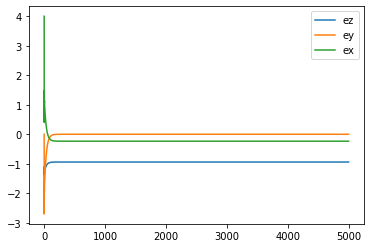

1.0588235294117638
4.011764705882353
3.1764705882352873


In [16]:
# Demonstrate that PC networks can do this in a toy case
from copy import deepcopy
#  Equations
#z = N(1,1)
#x = 4z + N(0,1)
#y = 7z + N(0,1) 
# let's simulate the PC network
def simulate_PC(lr = 0.05,do_x = None, do_y = None, do_z = None, fix_x = None, fix_y = None, fix_z = None):
  mu_zs = []
  mu_xs = []
  mu_ys = []
  ezs = []
  exs = []
  eys = []
  mu_z = 0.0
  mu_x = 0
  mu_y = 0 # init to zero
  for i in range(5000):
    pred_z = 2
    pred_x = 4 * mu_z
    pred_y = 3 * mu_z
    if fix_x is not None:
      mu_x = fix_x
    if fix_y is not None:
      mu_y = fix_y
    if fix_z is not None:
      mu_z = fix_z
    e_z = mu_z - pred_z
    e_x = mu_x - pred_x
    e_y = mu_y - pred_y
    if do_x is not None:
      mu_x = do_x
      e_x = 0
    if do_y is not None:
      mu_y = do_y
      e_y = 0
    if do_z is not None:
      mu_z = do_z
      e_z = 0
    zdot = -e_z + (4 * e_x) + (3 * e_y)
    xdot = -e_x
    ydot = -e_y
    mu_z += lr *  zdot
    mu_x += lr * xdot
    mu_y += lr *  ydot
    mu_zs.append(deepcopy(mu_z))
    mu_xs.append(deepcopy(mu_x))
    mu_ys.append(deepcopy(mu_y))
    ezs.append(deepcopy(e_z))
    eys.append(deepcopy(e_y))
    exs.append(deepcopy(e_x))
  
  plt.plot(mu_zs, label="z")
  plt.plot(mu_ys, label="y")
  plt.plot(mu_xs,label="x")
  plt.legend()
  plt.show()

  plt.plot(ezs, label="ez")
  plt.plot(eys, label="ey")
  plt.plot(exs,label="ex")
  plt.legend()
  plt.show()
  print(mu_z)
  print(mu_x)
  print(mu_y)

simulate_PC(fix_x = 4)
